__NAME:__ __Nigel Mansell__  
__SECTION:__ __995__  
__CS 5970: Machine Learning Practices__

# Homework 12: Dimensionality Reduction with Isometric Mapping

## Assignment Overview
Follow the TODOs and read through and understand any provided code.  
For all plots, make sure all necessary axes and curves are clearly and 
accurately labeled. Include figure/plot titles appropriately as well. Post and questions you may have to the Canvas Discussion.

### Task
For this assignment you will be exploring dimensionality reduction using IsoMap.
IsoMap creates a graph of nearest neighbors whilst attempting to perserve geodesic distances along a manifold.

### Data set
The data set is synthetic.  
File: hw12_isomap_squirrelly_data.csv  
This data set has 1000 samples and four columns (index, x0, x1, x2).   
Your goal is to predict x2 given x0 and x1 using the LinearRegression model.  


### Objectives
* Overfitting
* Regularization
* Dimensionality Reduction with Isomap

### Notes
* Do not save work within the ml_practices folder

### General References
* [Guide to Jupyter](https://www.datacamp.com/community/tutorials/tutorial-jupyter-notebook)
* [Python Built-in Functions](https://docs.python.org/3/library/functions.html)
* [Python Data Structures](https://docs.python.org/3/tutorial/datastructures.html)
* [Numpy Reference](https://docs.scipy.org/doc/numpy/reference/index.html)
* [Numpy Cheat Sheet](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Numpy_Python_Cheat_Sheet.pdf)
* [Summary of matplotlib](https://matplotlib.org/3.1.1/api/pyplot_summary.html)
* [DataCamp: Matplotlib](https://www.datacamp.com/community/tutorials/matplotlib-tutorial-python?utm_source=adwords_ppc&utm_campaignid=1565261270&utm_adgroupid=67750485268&utm_device=c&utm_keyword=&utm_matchtype=b&utm_network=g&utm_adpostion=1t1&utm_creative=332661264365&utm_targetid=aud-299261629574:dsa-473406587955&utm_loc_interest_ms=&utm_loc_physical_ms=9026223&gclid=CjwKCAjw_uDsBRAMEiwAaFiHa8xhgCsO9wVcuZPGjAyVGTitb_-fxYtkBLkQ4E_GjSCZFVCqYCGkphoCjucQAvD_BwE)
* [Pandas DataFrames](https://urldefense.proofpoint.com/v2/url?u=https-3A__pandas.pydata.org_pandas-2Ddocs_stable_reference_api_pandas.DataFrame.html&d=DwMD-g&c=qKdtBuuu6dQK9MsRUVJ2DPXW6oayO8fu4TfEHS8sGNk&r=9ngmsG8rSmDSS-O0b_V0gP-nN_33Vr52qbY3KXuDY5k&m=mcOOc8D0knaNNmmnTEo_F_WmT4j6_nUSL_yoPmGlLWQ&s=h7hQjqucR7tZyfZXxnoy3iitIr32YlrqiFyPATkW3lw&e=)
* [Sci-kit Learn Linear Models](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model)
* [Sci-kit Learn Ensemble Models](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.ensemble)
* [Sci-kit Learn Metrics](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics)
* [Sci-kit Learn Model Selection](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.model_selection)
* [Sci-kit Learn Pipelines](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html)
* [Sci-kit Learn Preprocessing](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing)

In [2]:
import sys

import pandas as pd
import numpy as np
#import seaborn as sns
import scipy.stats as stats
import os, re, fnmatch
import pathlib, itertools
import time as timelib
import matplotlib.pyplot as plt
import matplotlib.patheffects as peffects

from matplotlib import cm
# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import explained_variance_score, confusion_matrix
from sklearn.metrics import mean_squared_error, roc_curve, auc, f1_score
#from sklearn.externals import joblib
from sklearn.manifold import Isomap

FIGW = 15
FIGH = 4
FONTSIZE = 10

#plt.rcParams['figure.figsize'] = (FIGW,FIGH)
plt.rcParams['font.size'] = FONTSIZE

plt.rcParams['xtick.labelsize'] = FONTSIZE
plt.rcParams['ytick.labelsize'] = FONTSIZE

%matplotlib inline
#https://matplotlib.org/3.1.1/tutorials/introductory/images.html
plt.style.use('ggplot')

In [3]:
"""
Display current working directory of this notebook. If you are using 
relative paths for your data, then it needs to be relative to the CWD.
"""
HOME_DIR = pathlib.Path.home()
pathlib.Path.cwd()

PosixPath('/home/nigel/Desktop/mlp/homework12')

# LOAD DATA

In [4]:
"""
Load the data
"""
data = pd.read_csv('hw12_isomap_squirrelly_data.csv')

nrows, ncols = data.shape
print("%d rows and %d columns" % (nrows, ncols))

1000 rows and 4 columns


In [5]:
""" TODO
Seperate the feature inputs from the predicted output
x0 and x1 are the inputs
x2 is the output we want to predict
"""
# TODO: Get x0 and x1 as the inputs
X = data[data.columns.drop(['x2'])]

# TODO: Get x2 as the output
x2 = data['x2']

Text(0.5, 1.0, 'View Along the Manifold')

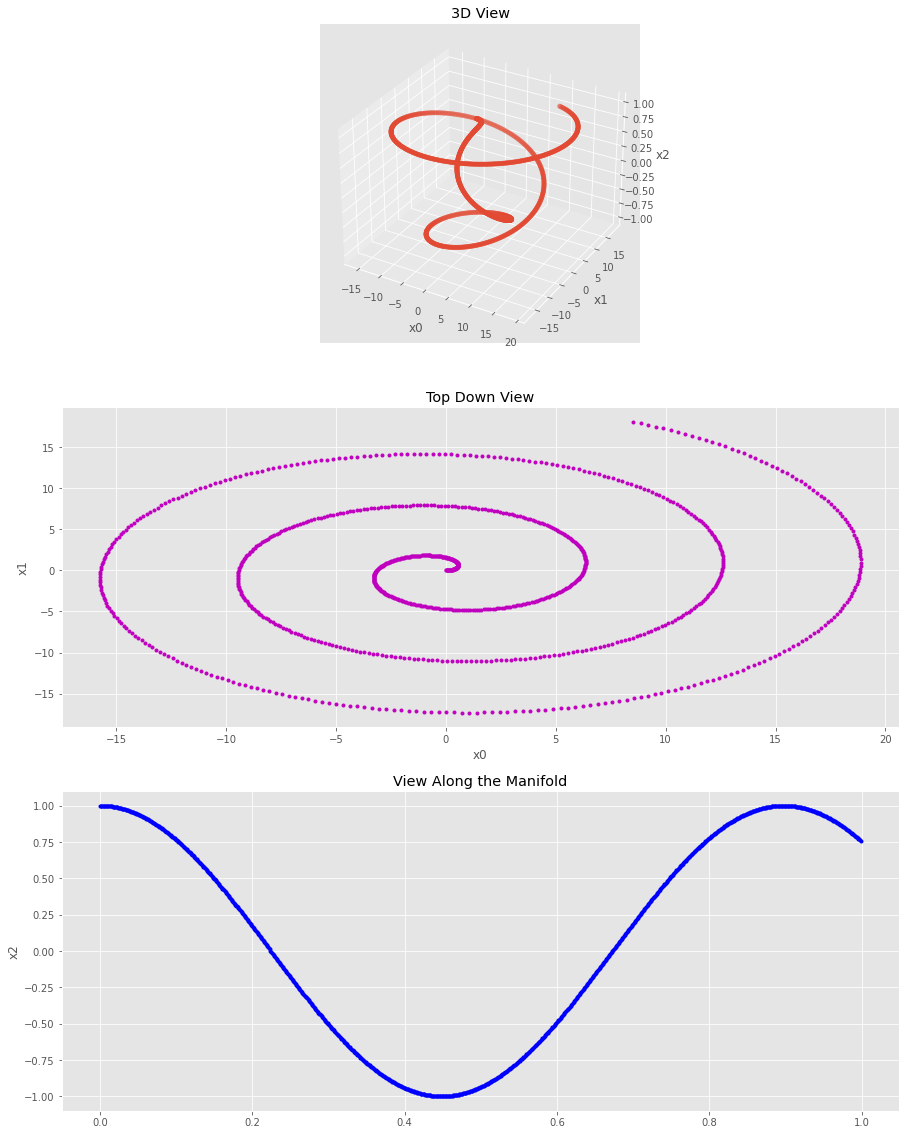

In [6]:
""" PROVIDED
Visualize the data
"""
# Position along the manifold
pos = np.arange(0, 1, .001)

fig = plt.figure(figsize=(FIGW,20)) #plt.figaspect(0.5))

# 3D View
ax0 = fig.add_subplot(3, 1, 1, projection='3d')
ax0.scatter(X['x0'], X['x1'], x2)
ax0.set(xlabel='x0', ylabel='x1', zlabel='x2')
ax0.set_title('3D View')

# Top Down View
ax1 = fig.add_subplot(3, 1, 2)
ax1.plot(X['x0'], X['x1'], 'm.')
ax1.set(xlabel='x0', ylabel='x1')
ax1.set_title('Top Down View')

# View Along the Data Manifold
ax2 = fig.add_subplot(3, 1, 3)
ax2.plot(pos, x2, 'b.')
ax2.set(ylabel='x2')
ax2.set_title('View Along the Manifold')

In [7]:
""" PROVIDED
The unnamed column is the row index
"""
data.head(3)

,Unnamed: 0,x0,x1,x2
0,0,0.000000,0.0000,1.000000
1,1,0.019996,0.0004,0.999976
2,2,0.039968,0.0016,0.999902


### PRELIMINARY DISCUSSION
Describe the behavior of these data in 3 to 4 sentences.

# LINEAR REGRESSION

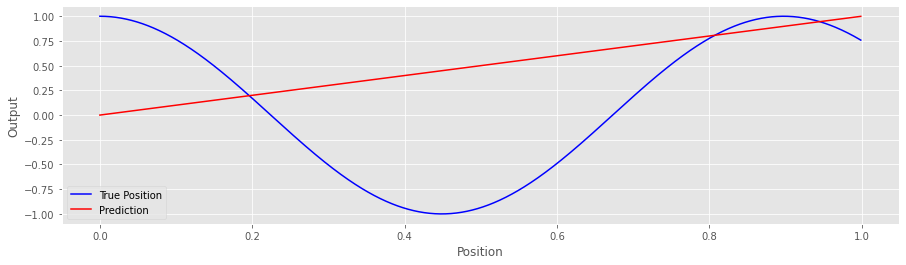

In [8]:
""" TODO
Fit a linear model using X as the input
and the position along the manifold, the variable pos, as the output
"""
# TODO: create and fit the linear model. The output is pos
lnr = LinearRegression().fit(X, pos)


# TODO: predict the positions from the original input X with the linear model
pos_preds = lnr.predict(X)

# TODO: Show the results. compare the true positions to the predictions
fig, ax = plt.subplots(figsize=(FIGW,FIGH))
ax.plot(pos, x2, 'b', label='True Position')
ax.plot(pos, pos_preds, 'r', label='Prediction')
ax.set(xlabel='Position', ylabel='Output')
ax.legend()

# ISOMAP

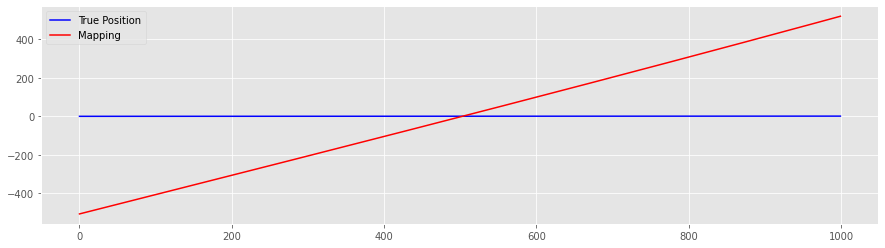

In [26]:
""" TODO
Fit an IsoMap object to the input data X, which contains the features x0 and x1

Use the IsoMap object to transform the input data

Try small values, less than 10, for the number of neighbors and 

Think about reasonable values for n_components based on the data
"""
# TODO: create and fit an IsoMap object 
isomap = Isomap(n_neighbors=6,n_components=1).fit(X)


# TODO: transform the inputs with the IsoMap object
Xmap = isomap.transform(X)

# Plot the result overlaying the True Positions
# with the IsoMap transformed features
fig, ax = plt.subplots(figsize=(FIGW,FIGH))
ax.plot(pos,'b', label='True Position')
ax.plot(Xmap, 'r', label='Mapping')
ax.legend()

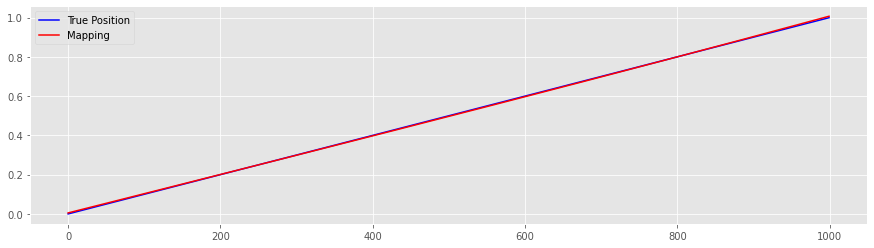

In [28]:
""" TODO
Fit another linear regression model on the isomap transformed inputs and the position 
along the manifold, the variable pos, as the output
"""
# TODO: Create and fit the model to the IsoMap features
lnr_isomap = LinearRegression().fit(Xmap, pos)


# TODO: predict the positions from the IsoMap features, with the linear model
pos_preds_isomap = lnr_isomap.predict(Xmap)

# TODO: Show the prediction results, overlayed with the true positions
fig, ax = plt.subplots(figsize=(FIGW,FIGH))
ax.plot(pos, 'b', label='True Position')
ax.plot(pos_preds_isomap, 'r', label='Mapping')
ax.legend()


# POLYNOMIAL FEATURES

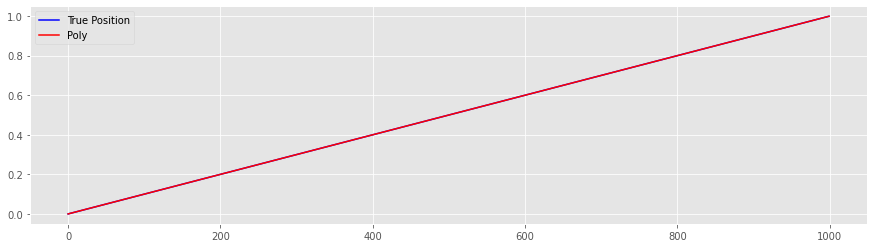

In [30]:
""" TODO
Construct polynomial expanded features from the original X input
using PolynomialFeatures. Play with a few values for the degree 
between 2 and 6, and set include_bias to True

Fit another linear regression model from the polynomial expanded
features as input and the position along the manifold, the variable 
pos, as the output
"""
# TODO: Construct the polynomial features from the original inputs
poly_features1 = PolynomialFeatures(degree=4, include_bias=True)
Xpoly = poly_features1.fit_transform(X)

# TODO: Fit the model to the polynomial features
lnr_poly = LinearRegression().fit(Xpoly, pos)
pos_preds_poly = lnr_poly.predict(Xpoly)

# TODO: Show the results. compare the true positions to the predictions
fig, ax = plt.subplots(figsize=(FIGW,FIGH))
ax.plot(pos, 'b', label='True Position')
ax.plot(pos_preds_poly, 'r', label='Poly')
ax.legend()


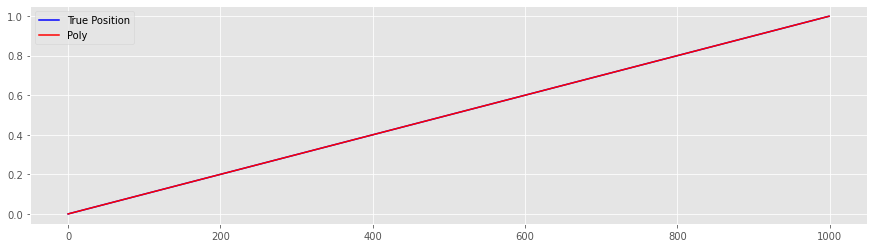

In [31]:
""" TODO
Construct polynomial features from the IsoMap transformed
input features

Fit another linear regression model from these features as input
and the position along the manifold, the variable pos, as the output
"""
# TODO: Construct the polynomial features from the IsoMap inputs
poly_features2 = PolynomialFeatures(degree=4, include_bias=True)
Xmap_poly = poly_features1.fit_transform(Xmap)

# TODO: Fit the model to the polynomial IsoMap features
lnr_iso_poly = LinearRegression().fit(Xmap_poly, pos)
pos_preds_iso_poly = lnr_iso_poly.predict(Xmap_poly)

# TODO: Show the results. Compare position to the predicted output
fig, ax = plt.subplots(figsize=(FIGW,FIGH))
ax.plot(pos, 'b', label='True Position')
ax.plot(pos_preds_iso_poly, 'r', label='Poly')
ax.legend()


# PREDICITON
Now, we will predict x2 from X


### LinearRegression Benchmark
In the previous section, we were trying to predict the position along the manifold from various forms of the inputs. Now you will try to predict actual position in 3D space, x2.

0.500954026351881

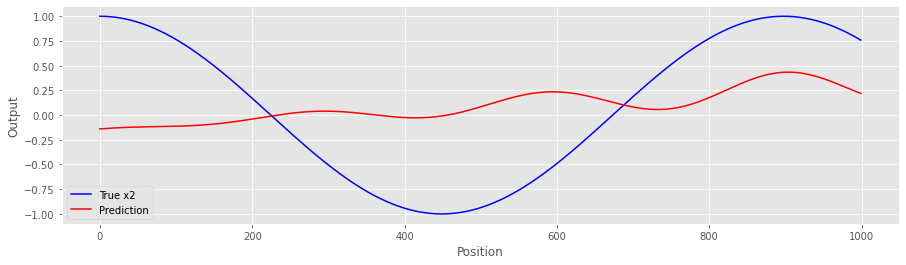

In [13]:
""" TODO
Fit a linear regression model that predicts x2 from the original x0 and x1
output is x2
"""
# TODO: Fit the model to the original features. The output is x2
lnr = LinearRegression().fit(X, x2)
x2preds = lnr.predict(X)

# TODO: Show the results. Compare the predicitons to the true x2
fig, ax = plt.subplots(figsize=(FIGW,FIGH))
ax.plot(x2, 'b', label='True x2')
ax.plot(x2preds, 'r', label='Prediction')
ax.set(xlabel='Position', ylabel='Output')
ax.legend()


# TODO: Compute the training/prediction error. Use mean_squared_error()
mean_squared_error(x2, x2preds)


### IsoMap LinearRegression

0.504326907049492

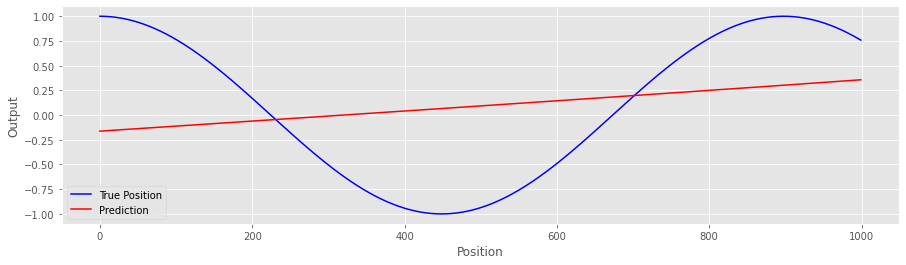

In [20]:
""" TODO
Fit a linear regression model to predict x2 from the IsoMap
transformed versions of x0 and x; output is x2
"""
# TODO: Fit the model to the IsoMap features computed above. output is x2
lnr_isomap = LinearRegression().fit(Xmap,x2)
x2preds_isomap = lnr_isomap.predict(Xmap)

# TODO: Show the results. Compare the predicitons to the true x2
fig, ax = plt.subplots(figsize=(FIGW,FIGH))
ax.plot(x2, 'b', label='True Position')
ax.plot(x2preds_isomap, 'r', label='Prediction')
ax.set(xlabel='Position', ylabel='Output')
ax.legend()

# TODO: Compute the training/prediction error. Use mean_squared_error()
mean_squared_error(x2, x2preds_isomap)


### PolynomialFeatures LinearRegression

(1000, 35)


1.527869166085519e-08

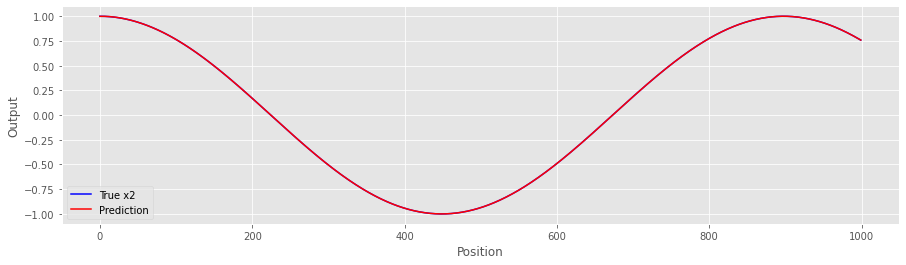

In [15]:
""" TODO
Fit a linear regression model to predict x2 from the polynomially
expanded features; output is x2
"""
# TODO: Construct the polynomial features from the original inputs
poly_features1 = PolynomialFeatures(degree=4, include_bias=True).fit(X)
Xpoly = poly_features1.transform(X)
print(Xpoly.shape)

# TODO: Fit the model to the polynomial features. output is x2
lnr_poly = LinearRegression().fit(Xpoly, x2)
x2preds_poly = lnr_poly.predict(Xpoly)

# TODO: Show the results. Compare the predictions to the true x2
fig, ax = plt.subplots(figsize=(FIGW,FIGH))
ax.plot(x2, 'b', label='True x2')
ax.plot(x2preds_poly, 'r', label='Prediction')
ax.set(xlabel='Position', ylabel='Output')
ax.legend()


# TODO: Compute the training error
mean_squared_error(x2, x2preds_poly)


### IsoMap Polynomial Features LinearRegression

0.0031451591965084846

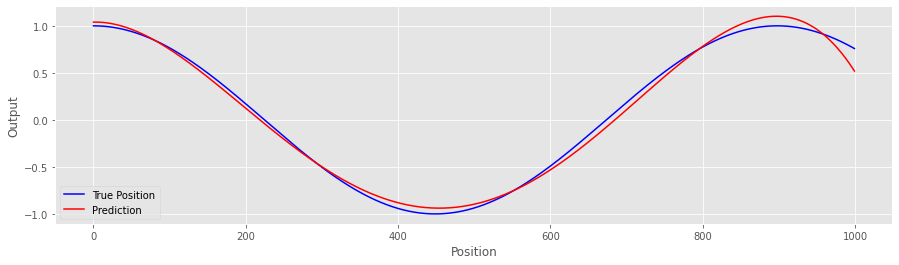

In [21]:
""" TODO
Fit a linear regression model to predict x2 from the polynomially
expanded IsoMap transformed features; output is x2
"""
# TODO: Construct the polynomial features from the IsoMap inputs
poly_features2 = PolynomialFeatures(degree=4, include_bias=True).fit(Xmap)
Xmap_poly = poly_features2.transform(Xmap)

# TODO: Fit the model to the polynomial IsoMap features. output is x2
lnr_iso_poly = LinearRegression().fit(Xmap_poly, x2)
x2preds_iso_poly = lnr_iso_poly.predict(Xmap_poly)

# TODO: Show the results. Compare true x2 to the predictions
fig, ax = plt.subplots(figsize=(FIGW,FIGH))
ax.plot(x2, 'b', label='True Position')
ax.plot(x2preds_iso_poly, 'r', label='Prediction')
ax.set(xlabel='Position', ylabel='Output')
ax.legend()

# TODO: Compute the training error
mean_squared_error(x2, x2preds_iso_poly)


# DISCUSSION
In several paragraphs, compare the performance of each of the Linear Regression models explored within the PREDICTION section. List the models in order of the quality of the predictions (1 being the model with the best quality). Is the model with the best quality perfect? Please be clear and concise in your explanation. 

1. IsoMap Polynomial Features LinearRegression:
    The predictions follow the closely to that of the true positions without being unrealistic.
    MSE is 0.0031451591965084846 which is close to 0 without being too close.
    
2. PolynomialFeatures LinearRegression:
    At first thought, I felt this was the best model, but after further consideration, and looking at how
    low the MSE is(1.527869166085519e-08) I think that is too low and could result to over refinement.
    
3. LinearRegression Benchmark:
    The predictions have a similar shape(having curves) to the true positions, but is still off on
    accuracy.
    MSE is 0.500954026351881, not close enough to 0 compared to the above.
    
4. IsoMap LinearRegression:
    The predictions is a straigt line, which is not ideal, but better than nothing.
    MSE is 0.504326907049492, since it is higher than the benchmark, it is a little worse.
    
No, I dont think that any model is 'perfect', it is impossible to predict perfectly....but it is possible to have a model that predicts reasonably and reliably.